The visualization methods implemented in PEtab Select are demonstrated here. These methods generally visualize the output of a model selection task, so the input is generally a list of already-calibrated models. Here, some calibrated models that were saved to disk with `petab_select.model.models_to_yaml_list` are loaded and used as input.

In [1]:
import petab_select

models = petab_select.models_from_yaml_list(
    model_list_yaml="calibrated_models/calibrated_models.yaml"
)

The model IDs were automatically generated, so we create more readable labels here: a binary string that describes their position in the model space.

In [2]:
# Custom labels
labels = {}
for model in models:
    labels[model.get_hash()] = "M_" + "".join(
        "1" if value == petab_select.ESTIMATE else "0"
        for value in model.parameters.values()
    )

# Custom colors for some models
colors = {
    "M_000": "lightgreen",
    "M_001": "lightgreen",
}

# Change default color
petab_select.plot.NORMAL_NODE_COLOR = "darkgray"

# Selected models

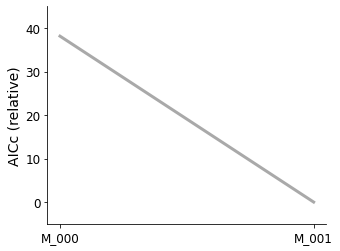

In [3]:
petab_select.plot.line_selected(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
);

# Selection history trajectory

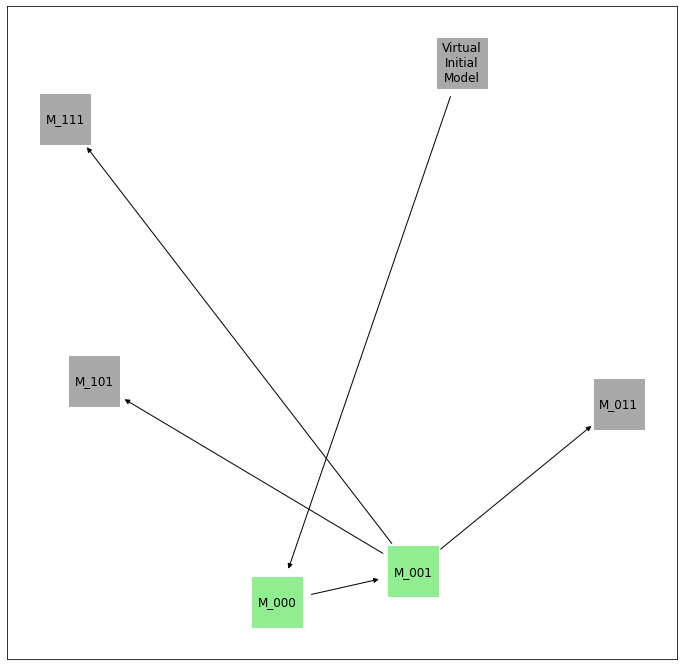

In [4]:
petab_select.plot.graph_history(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
    colors=colors,
);

# Criterion values of each model

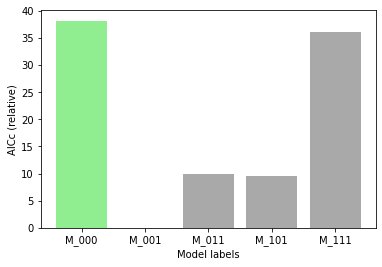

In [5]:
petab_select.plot.bar_criterion_vs_models(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
    colors=colors,
);

# Criterion values vs. number of estimated parameters

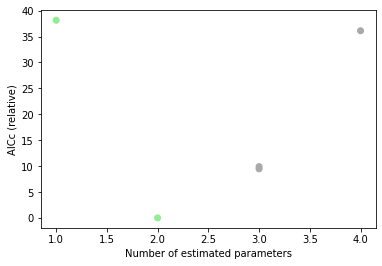

In [6]:
petab_select.plot.scatter_criterion_vs_n_estimated(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
    colors=colors,
);

# Iterations as layers in a hierarchical graph

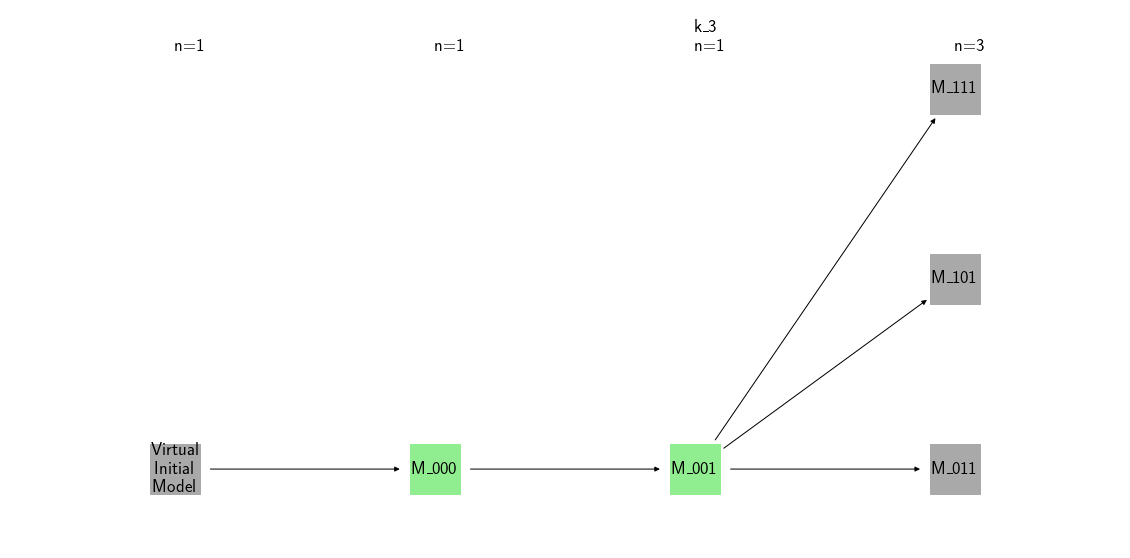

In [7]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True

petab_select.plot.graph_iteration_layers(
    models=models,
    criterion=petab_select.Criterion.AICC,
    labels=labels,
    colors=colors,
    draw_networkx_kwargs={
        "arrowstyle": "-|>",
        "node_shape": "s",
        "node_size": 2500,
        "font_size": 18,
    },
);